<a href="https://colab.research.google.com/github/JadonFreed/OptimizationML/blob/main/Copy_of_Lecture_6_pytorch_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About pytorch

- Todays lecture is about the fundementals of pytorch
- Pytorch is the main python package we will use in this course
- It is one of the most popular packages for machine learning
- Documentation for pytorch: https://pytorch.org/docs


# Outline of todays lecture

1. Finite differencing
2. Tensors (generalization of matricies/vectors)
3. Automatic differentiation using pytorch

In [ ]:
import numpy as np
import math

# Finite differencing

Suppose I want to compute the derivative at $x = 0.0$ but **not** manually

How? Recall the formula for the derivative:
$$
\frac{d f}{dx} = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}
$$

We can estimate this by simply pick $h$ small, e.g., 1e-4

### Create a test function and plot it

## Arthemetic errors on computers

 * Computers do not exactly store numbers. They only have "finite precision" which roughly means that only a certain number of decimals can be stored.

* On most modern computers each floating point number is stored on 64 bits which gives approximately 15 decimal digits of precision.

* When the results of arithmetic calculations are computed they are rounded to the nearest `bit' which can cause loss of accuracy.

* This particularly a problem when subtracting two numbers with very similar values.

* Moreover, these errors can accumulate.

### Example

Consider doing the calculation
$$
\sqrt{101} - 10
$$
using a computer than can only compute 4 digits of accuracy for each arithmetic operation.

The correct solution to four digits is $0.04987$.
However, the computer will evaluate $\sqrt{101} = 10.05$ and then $10.05 - 10 = 0.05$. This is only correct to one digit of accuracy.

**Changing the precision in python**

Numbers can be stored to different levels of precision (which impacts the accuracy that answers are reported). For example,

Higher precision gives more accurate calcuations but the cost is that computations are slower and memory usage is higher.

***Questions on arthemetic differences (one question)***

## Difficulties using finite differencing to compute gradients



1. For multivariate functions it can be computationally time consuming because we need to evaluate the function for each coordinate $i$:
$$
\frac{df}{d x_i} ≈ \frac{f(x+h e_i)-f(x)}{h}
$$
where $e_i$ is a vector with one in the $i$th entry and zero elsewhere.
For example, to compute the gradient of $f(x) = x_1 x_2 x_3$ we need to compute
$$
\frac{df}{d x_1} ≈ \frac{f(x+h e_1)-f(x)}{h} = \frac{(x_1 + h) x_2 x_3 - x_1 x_2 x_3}{h}
$$
$$
\frac{df}{d x_2} ≈ \frac{f(x+h e_2)-f(x)}{h} = \frac{x_1 (x_2 + h) x_3 - x_1 x_2 x_3}{h}
$$
$$
\frac{df}{d x_3} ≈ \frac{f(x+h e_3)-f(x)}{h} = \frac{x_1 x_2 (x_3 + h) - x_1 x_2 x_3}{h}
$$


2. It is difficult to pick $h$. Too big and there will even if there are no arthemetic errors the derivative will be inaccurate. Too small and arthemetic errors can also cause the calculated derivative to be inaccuracte (because we are subtracting small values in the calculation).

***Questions on finite differences (two questions)***



# Tensors

A tensor is a generalization of a vector and matrix. A vector has height (or width), a matrix has both width and height. A tensor can have many "dimensions" (or just one, i.e., a vector):
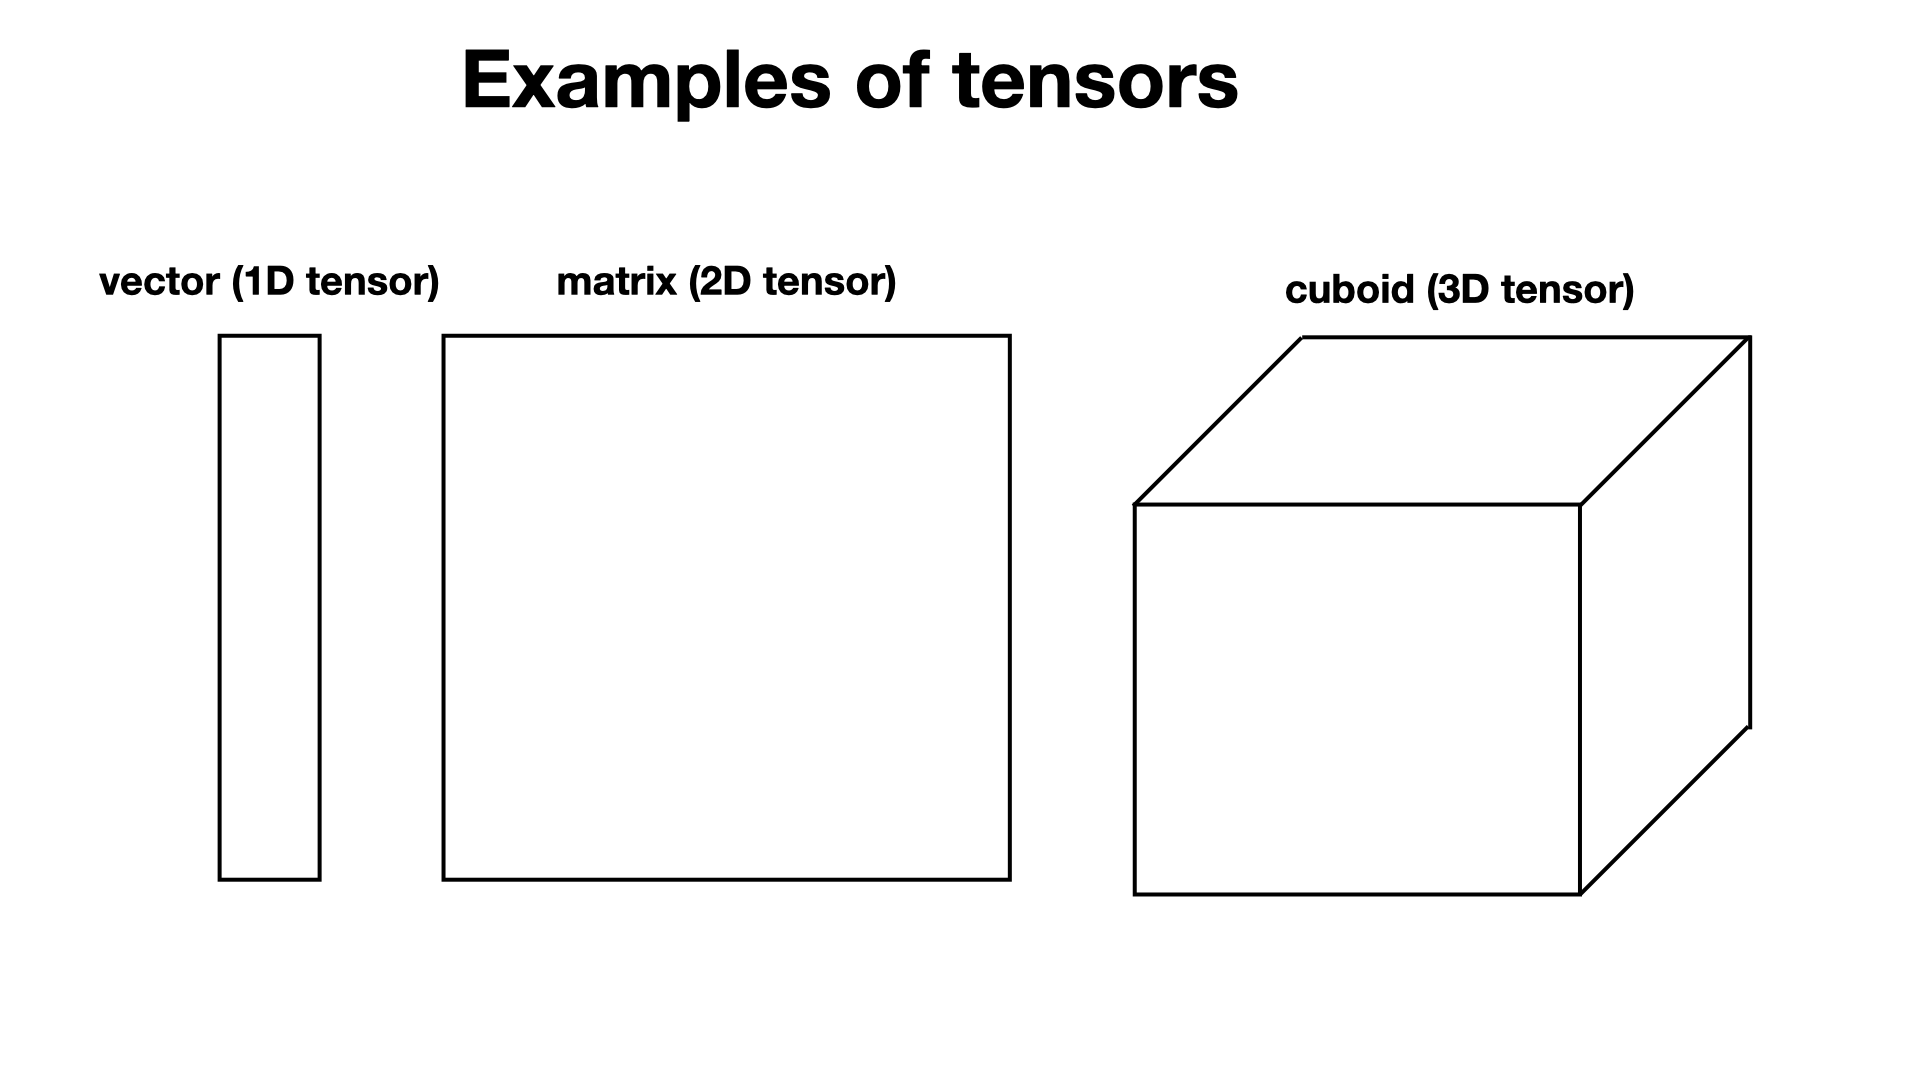

## Tensors in numpy (known as arrays)



In numpy we can create and manipulate tensors (which are called arrays)

In [ ]:
import numpy as np


***Three questions on tensors***

## Tensors in pytorch

At its core Pytorch is a package for

1. automatic differentiation

2. automatically using hardware accelerators (e.g., GPUs)

These two features are critical to modern machine learning.

### Parrallel vs serial computation

Serial tasks are tasks that must be performed
sequentially (one after the other). The order that the tasks are performed
in is important due to dependicies between the tasks.
For example:
$$
y = \cos(x) \quad z = \log(y) \quad v = z + 3.
$$
The computer has to perform three tasks sequentially.

Parrallelizable tasks are a list of tasks that can be performed indepedently and therefore can be distributed across different computers. For example:
$$
y = \cos(x) \quad z = \log(x) \quad v = x + 3.
$$

### Hardware accelerators

Central processing units (CPUs) can only perform one operation at a time. You can think of them as a single "calculator".

Modern personal computers often have multiple CPUs (also known as cores) but the overall number is small (4-30).
This is what your personal computer uses to perform everyday tasks (e.g., using word) because typical tasks on personal computers are sequential.

Hardware accelerators are better at matrix-matrix multiplication because they
use thousands of slower CPUs in parallel. For example, the [NVIDIA RTX 6000](https://www.nvidia.com/content/dam/en-zz/Solutions/design-visualization/rtx-6000/proviz-print-rtx6000-datasheet-web-2504660.pdf) has 18,176 CUDA cores (CPUs).

Examples of hardware accelators include graphical processing units (GPUs) and tensor processing units (TPUs).

These hardware accelerators enable training of machine learning models to be much faster in practice (note that typical training times for large models with GPUs can be days or weeks).

**Note:** we will be using GPUs alot at the end of the course. You only get a certain quota of GPU usage so save them for later.



In [ ]:
import numpy as np

***Two questions on hardware accelerators.***

# Automatic differentiation

Recall the chain rule states that:
$$
\frac{d f}{d x} = \frac{d f}{d y} \frac{d y}{dx}
$$

## How does automatic differentiation work?

Automatic differentiation is:

- A method for automatically differentiating complicated compositions of simple functions (e.g., $\sin, \cos, \ln, x^4$)
- Given a function it automatically computes the derivatives using the chain rule/product rule
- Similar to how you would compute derivatives by hand
- This is straight forward for simple functions but very time-consuming to do by hand for more complex functions

More specifically automatic differentiation consists of
1. A "forward pass" where the function is evaluated and intermediate values are stored
2. A "backwards pass" where the gradients are computed moving "backwards". This is performed after the forwards pass.

It compute the gradient of a function at single point. *It does not give an analytic formula for the derivatives*.

For example, take the derivative of
$$
f(x) = \sin(\cos(\ln(x)))
$$
at $x = 1$.

Forward pass:
$$
\ln(1) = 0 = y_1, \cos(\ln(1)) = 1 = y_2, \sin(\cos(\ln(1)) = 0.841 \dots = y_3
$$
Backward's pass:
$$
\frac{d y_3}{d y_2} = \frac{d \sin(y_2)}{d y_2} =  \cos(y_2) =_{\text{at $y_2 = 1$}} 0.540 \dots
$$

$$
\frac{d y_3}{d y_1} = \frac{d y_3}{d y_2} \frac{d y_2}{d y_1} = 0.540 \frac{d \cos(y_1)}{d y_1} = 0.540 \sin(y_1) =  0.540 \times 0 = 0
$$

$$
\frac{d y_3}{d x} = \frac{d y_3}{d y_1} \frac{d y_1}{d x} = 0 \times \frac{d y_1}{d x} = 0 \times \frac{d \ln(x)}{d x} = 0 \times \frac{1}{1} = 0
$$

Note: a common synonym for a "backwards pass" is "backwards propogation"

## Lets try to rebuilt my_wild_function but using pytorch

## A multivariate example:

Note that require_grad is a good example of a piece of meta-data that pytorch tensors have but numpy arrays do not.


## Gradient accumulation

Each time backprogation is called the new gradient is added to the old gradient.
This is known as gradient accumulation and can cause weird behaviour. To fix this we need to zero out gradient before call backward() again.

Compute the gradient at a different place:

## Requiring a gradient from of a variable on the fly

We can make a variable differentiable using the requires_grad_() method.

## Operations with no gradient

***Three questions on pytorch***